<a href="https://colab.research.google.com/github/brendanbautista/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [2]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/superstore_retail_orders (2).csv')

Mounted at /content/gdrive


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [4]:
#data preparation
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df_cleaned = df.dropna()


def month_num_to_abbr_only(month_year_str):
    _, month_num = month_year_str.split('-')
    month_abbr = pd.to_datetime(month_num, format='%m').strftime('%b')
    return month_abbr

df_cleaned['order_month_abbr_only'] = df_cleaned['order_year_month'].apply(month_num_to_abbr_only)

df_cleaned['total_sales'] = df_cleaned['quantity'] * df_cleaned['product_price']

df_cleaned.info(), df_cleaned.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55500 entries, 0 to 56044
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               55500 non-null  int64  
 1   order_date             55500 non-null  object 
 2   order_year_month       55500 non-null  object 
 3   customer_name          55500 non-null  object 
 4   city                   55500 non-null  object 
 5   state_province         55500 non-null  object 
 6   quantity               55500 non-null  float64
 7   product_name           55500 non-null  object 
 8   product_line           55500 non-null  object 
 9   product_price          55500 non-null  float64
 10  order_month_abbr_only  55500 non-null  object 
 11  total_sales            55500 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 5.5+ MB


<ipython-input-4-ffd0e763e7c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['order_month_abbr_only'] = df_cleaned['order_year_month'].apply(month_num_to_abbr_only)
<ipython-input-4-ffd0e763e7c1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['total_sales'] = df_cleaned['quantity'] * df_cleaned['product_price']


(None,
 order_id                   int64
 order_date                object
 order_year_month          object
 customer_name             object
 city                      object
 state_province            object
 quantity                 float64
 product_name              object
 product_line              object
 product_price            float64
 order_month_abbr_only     object
 total_sales              float64
 dtype: object)

In [5]:
#outlier check and cleanup
df_cleaned = df_cleaned[df_cleaned['quantity'] <= 10]
df_cleaned = df_cleaned[df_cleaned['product_price'] != 235481]
df_cleaned['order_year'] = df_cleaned['order_year_month'].apply(lambda x: int(x.split('-')[0]))
df_cleaned = df_cleaned[(df_cleaned['order_year'] >= 2018) & (df_cleaned['order_year'] <= 2024)]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53966 entries, 0 to 56044
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               53966 non-null  int64  
 1   order_date             53966 non-null  object 
 2   order_year_month       53966 non-null  object 
 3   customer_name          53966 non-null  object 
 4   city                   53966 non-null  object 
 5   state_province         53966 non-null  object 
 6   quantity               53966 non-null  float64
 7   product_name           53966 non-null  object 
 8   product_line           53966 non-null  object 
 9   product_price          53966 non-null  float64
 10  order_month_abbr_only  53966 non-null  object 
 11  total_sales            53966 non-null  float64
 12  order_year             53966 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.8+ MB


In [12]:
#impute values
# Impute missing values in 'quantity' with its median
median_quantity = df_cleaned['quantity'].median()
df_cleaned['quantity'].fillna(median_quantity, inplace=True)

# Verify if the missing values in 'quantity' have been filled
df_cleaned.isnull().sum()


order_id                  0
order_date                0
order_year_month          0
customer_name             0
city                      0
state_province            0
quantity                  0
product_name              0
product_line              0
product_price             0
order_month_abbr_only     0
total_sales               0
order_year                0
complete_customer_info    0
season                    0
type_of_product           0
dtype: int64

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [6]:
#create variable
customer_fields = ['order_id','order_date','order_year_month','customer_name', 'city', 'state_province', 'quantity', 'product_name', 'product_line', 'product_price','order_month_abbr_only','total_sales']
df_cleaned['complete_customer_info'] = df_cleaned[customer_fields].apply(lambda row: 1 if row.notnull().all() else 2, axis=1)

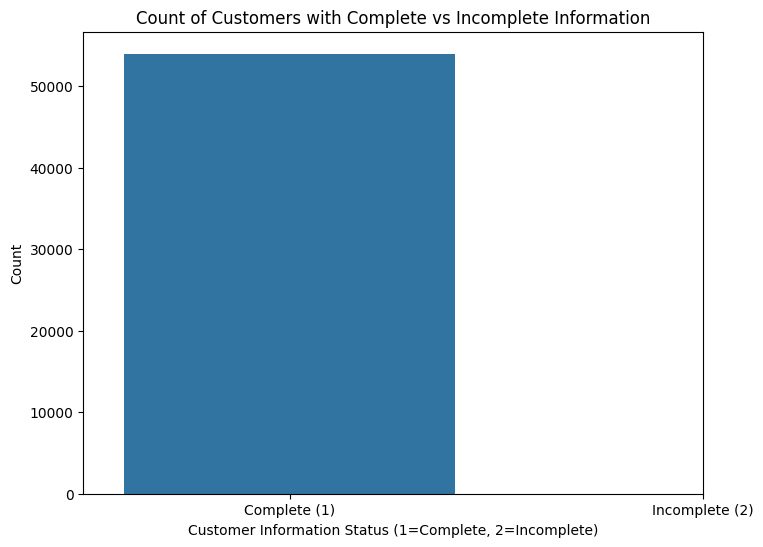

In [8]:
#create chart
complete_info_count_final = df_cleaned['complete_customer_info'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=complete_info_count_final.index, y=complete_info_count_final.values)
plt.title('Count of Customers with Complete vs Incomplete Information')
plt.xlabel('Customer Information Status (1=Complete, 2=Incomplete)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Complete (1)', 'Incomplete (2)'])

plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

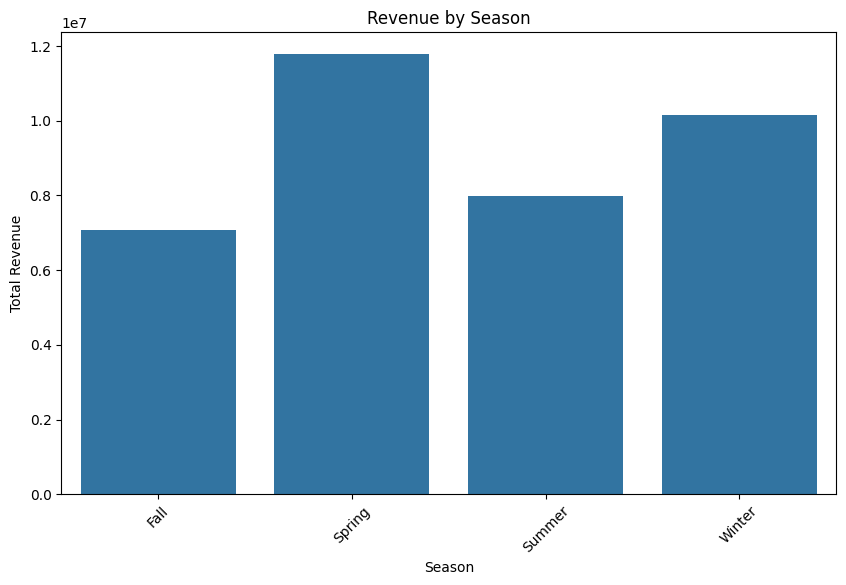

In [9]:
#seasonality
seasons = {
    'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter',
    'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
    'Sep': 'Fall',   'Oct': 'Fall',   'Nov': 'Fall'
}


df_cleaned['season'] = df_cleaned['order_month_abbr_only'].map(seasons)


seasonal_revenue = df_cleaned.groupby('season')['total_sales'].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_revenue.index, y=seasonal_revenue.values)
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)


plt.show()

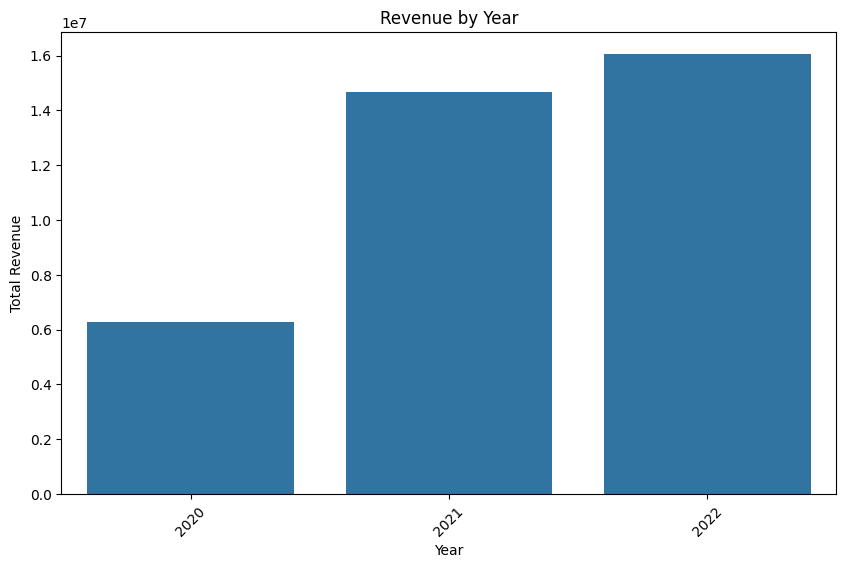

In [10]:
#revenue over time
df_cleaned['order_year'] = df_cleaned['order_year_month'].apply(lambda x: x.split('-')[0])


yearly_revenue = df_cleaned.groupby('order_year')['total_sales'].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_revenue.index, y=yearly_revenue.values)
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability


plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

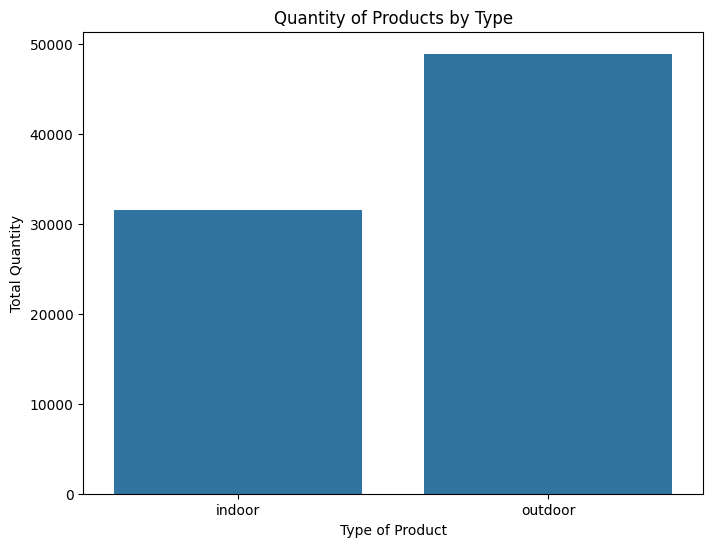

In [11]:
#indoor/outdoor variable
def categorize_product_line(product_line):
    indoor_lines = ['cameras', 'clothing', 'officeproducts', 'laptop', 'projector', 'electronics']
    outdoor_lines = ['accessories', 'bikes', 'mobile']

    product_line_lower = product_line.lower()

    if product_line_lower in indoor_lines:
        return 'indoor'
    elif product_line_lower in outdoor_lines:
        return 'outdoor'
    else:
        return 'unknown'


df_cleaned['type_of_product'] = df_cleaned['product_line'].apply(categorize_product_line)


quantity_by_type = df_cleaned.groupby('type_of_product')['quantity'].sum()




plt.figure(figsize=(8, 6))
sns.barplot(x=quantity_by_type.index, y=quantity_by_type.values)
plt.title('Quantity of Products by Type')
plt.xlabel('Type of Product')
plt.ylabel('Total Quantity')
plt.show()
